In [47]:
import rosbag
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
from tf_bag import BagTfTransformer

sns.set_theme(style="whitegrid")

directions = [1, 2]
approaches = ['teb', 'rl']

end_positions = {
    1: (-4.2, -4.8),
    2: (-1.35, -1.55)
}
df_list = []
for direction in directions:
    for approach in approaches:
        for i in range(15):
            folder = 'd{}_{}'.format(direction, i + 1)
            print('processing: {}'.format(folder))
            try:
                bag = rosbag.Bag('/home/dschori/Documents/new_rosbags/{}/{}/data_0.bag'.format(approach, folder))

                bag_transformer = BagTfTransformer(
                    '/home/dschori/Documents/new_rosbags/{}/{}/data_0.bag'.format(approach, folder))
            except rosbag.bag.ROSBagUnindexedException:
                continue

            x_s, y_s = [], []

            for topic, msg, t in bag.read_messages(topics=['/tf']):
                try:
                    translation, quaternion = bag_transformer.lookupTransform('map', 'base_link', t)
                    x_s.append(translation[0])
                    y_s.append(translation[1])
                except:
                    pass
            starting_point = (x_s[0], y_s[0])
            ending_point = (x_s[-1], y_s[-1])
            df_list.append(
                {
                    'Approach': approach,
                    'Direction': direction,
                    'Target Position': end_positions[direction],
                    'Actual Position': ending_point,
                    'Distance to Target': math.dist(ending_point, end_positions[direction])/10.
                }
            )
            bag.close()

data = pd.DataFrame(df_list)

processing: d1_1
processing: d1_2
processing: d1_3
processing: d1_4
processing: d1_5
processing: d1_6
processing: d1_7
processing: d1_8
processing: d1_9
processing: d1_10
processing: d1_11
processing: d1_12
processing: d1_13
processing: d1_14
processing: d1_15
processing: d1_1
processing: d1_2
processing: d1_3
processing: d1_4
processing: d1_5
processing: d1_6
processing: d1_7
processing: d1_8
processing: d1_9
processing: d1_10
processing: d1_11
processing: d1_12
processing: d1_13
processing: d1_14
processing: d1_15
processing: d2_1
processing: d2_2
processing: d2_3
processing: d2_4
processing: d2_5
processing: d2_6
processing: d2_7
processing: d2_8
processing: d2_9
processing: d2_10
processing: d2_11
processing: d2_12
processing: d2_13
processing: d2_14
processing: d2_15
processing: d2_1
processing: d2_2
processing: d2_3
processing: d2_4
processing: d2_5
processing: d2_6
processing: d2_7
processing: d2_8
processing: d2_9
processing: d2_10
processing: d2_11
processing: d2_12
processing

/opt/ros/noetic/lib/python3/dist-packages/tf/listener.py:63: UserWarning: translation should be of type Vector3
  self._buffer.set_transform(transform, authority)
/opt/ros/noetic/lib/python3/dist-packages/tf/listener.py:63: UserWarning: rotation should be of type Quaternion
  self._buffer.set_transform(transform, authority)
/home/dschori/PycharmProjects/MasterThesis/ackerbot_sim_ws/src/rl-scouting/scouting_train/scripts/tf_bag.py:99: UserWarning: translation should be of type Vector3
  self.transformer._buffer.set_transform_static(st_tfm, "default_authority")
/home/dschori/PycharmProjects/MasterThesis/ackerbot_sim_ws/src/rl-scouting/scouting_train/scripts/tf_bag.py:99: UserWarning: rotation should be of type Quaternion
  self.transformer._buffer.set_transform_static(st_tfm, "default_authority")


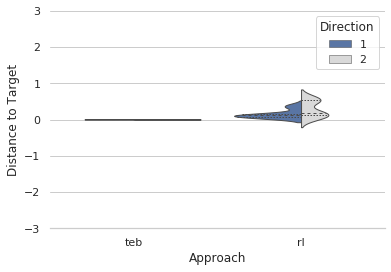

In [48]:
ax = sns.violinplot(data=data, x="Approach", y="Distance to Target", hue='Direction',
               split=True, inner="quart", linewidth=1,
               palette={1: "b", 2: ".85"})
ax.set(ylim=(-3., 3.))
sns.despine(left=True)

plt.show()

/home/dschori/.local/lib/python3.8/site-packages/seaborn/categorical.py:1347: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(-.5, len(self.plot_data) - .5)
/home/dschori/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 46.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/dschori/.local/lib/python3.8/site-packages/seaborn/categorical.py:376: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(-.5, len(self.plot_data) - .5, auto=None)


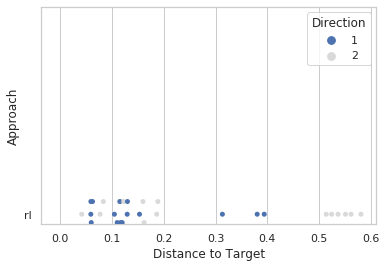

In [49]:
plt.yscale('log')
ax = sns.swarmplot(data=data, x="Distance to Target", y="Approach", hue="Direction",
               palette={1: "b", 2: ".85"})

In [50]:
import numpy as np
log_data = [np.log10(d) for d in data['Distance to Target']]

In [51]:
data['Distance to Target'] = log_data

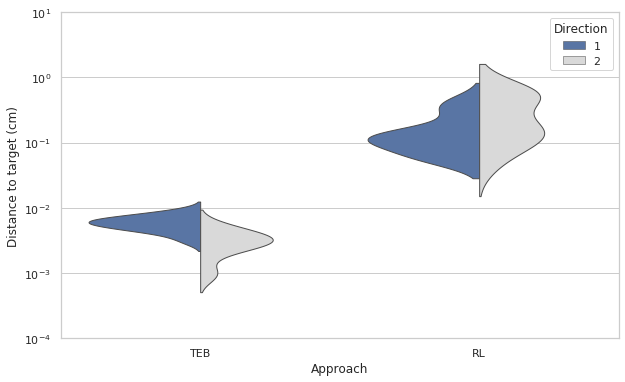

In [70]:
from matplotlib import ticker as mticker
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax = sns.violinplot(data=data, x="Approach", y="Distance to Target", hue='Direction',
               split=True, inner=None, linewidth=1,
               palette={1: "b", 2: ".85"}, legend_out=False, ax=ax)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
#ax.yaxis.set_major_formatter(mticker.StrMethodFormatter("${x:.1f}$"))
ax.yaxis.set_ticks([np.log10(x) for p in range(-6,1) for x in np.linspace(10**p, 10**(p+1), 10)], minor=True)
ax.set(ylim=(-4, 1))
ax.set(xlabel='Approach', ylabel='Distance to target (cm)')
ax.set_xticklabels(['TEB', 'RL'])
plt.savefig('violin_distribution.png', dpi=300)
plt.show()